In [2]:
#!/usr/bin/env python3
#### Import all the required libraries
import pandas as pd #### Library for working with large datsets
import numpy as np #### Library for performing numerical calculations
import matplotlib.pyplot as plt #### Baasic Library for plotting graphs
#### Configuring Matplotlib to show Plots inline
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots
import datetime as dt
from math import radians, cos, sin, asin, sqrt

In [3]:
#### Loading the Data
data = pd.read_excel('sales.xlsx')
data = data[data.Category=='Furniture']
data = data.drop('Category',1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 9727
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Row ID                 2067 non-null   int64         
 1   Order ID               2067 non-null   object        
 2   Order Date             2067 non-null   datetime64[ns]
 3   Ship Date              2067 non-null   datetime64[ns]
 4   Ship Mode              2067 non-null   object        
 5   Customer ID            2067 non-null   object        
 6   Customer Name          2067 non-null   object        
 7   Segment                2067 non-null   object        
 8   Country                2067 non-null   object        
 9   City                   2067 non-null   object        
 10  State                  2067 non-null   object        
 11  Postal Code            2067 non-null   int64         
 12  Region                 2067 non-null   object        
 13  Pro

In [4]:
data_fur = data[data['Sub-Category']=='Furnishings']
data_fur = data_fur[['Order Date','Quantity']]

In [5]:
data_fur.info()
data_fur1 = data_fur.groupby(pd.Grouper(key='Order Date', freq='1M')).sum()
data_fur1=data_fur1.reset_index()
data_fur1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 5 to 9727
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  932 non-null    datetime64[ns]
 1   Quantity    932 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 21.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  45 non-null     datetime64[ns]
 1   Quantity    45 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 848.0 bytes


In [6]:
data_fur1.tail()

,Order Date,Quantity
40,2017-08-31,61
41,2017-09-30,133
42,2017-10-31,96
43,2017-11-30,179
44,2017-12-31,171


<AxesSubplot:xlabel='Order Date'>

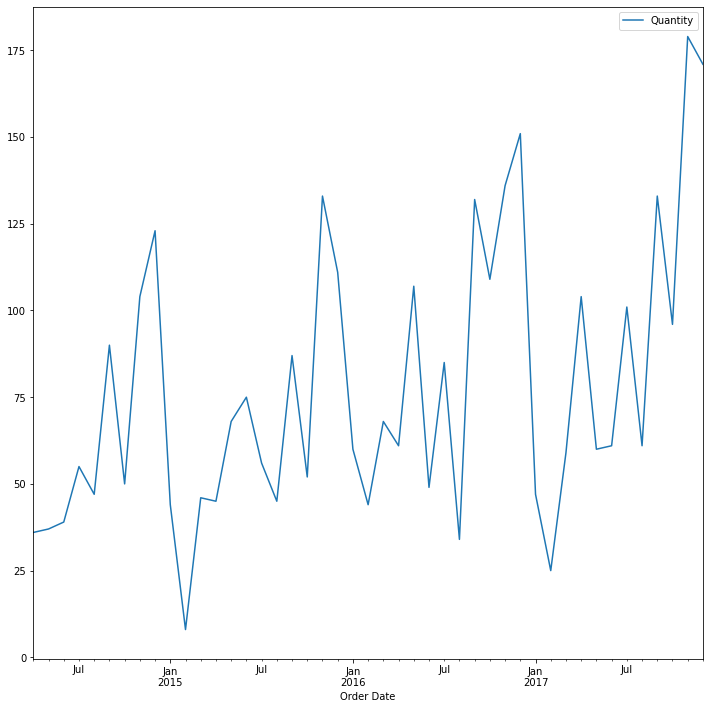

In [7]:
data_fur1.plot.line(x='Order Date',y='Quantity')

In [8]:
data_fur1_train = data_fur1[:-9]
data_fur1_test = data_fur1[-9:]
print(data_fur1_train.tail())
print(data_fur1_test.head())
print(len(data_fur1_test))

   Order Date  Quantity
31 2016-11-30       136
32 2016-12-31       151
33 2017-01-31        47
34 2017-02-28        25
35 2017-03-31        59
   Order Date  Quantity
36 2017-04-30       104
37 2017-05-31        60
38 2017-06-30        61
39 2017-07-31       101
40 2017-08-31        61
9


In [9]:
data_fur1_train.head(20)

,Order Date,Quantity
0,2014-04-30,36
1,2014-05-31,37
2,2014-06-30,39
3,2014-07-31,55
4,2014-08-31,47
5,2014-09-30,90
6,2014-10-31,50
7,2014-11-30,104
8,2014-12-31,123
9,2015-01-31,44


In [19]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(data_fur1_train['Quantity'].values, lags=3, seasonal=True, period=12)
model_fit = model.fit()
# make prediction
y_predict = model_fit.predict(len(data_fur1_train), len(data_fur1_train)+8)
print(y_predict)
print(data_fur1_test.Quantity.values)

[ 52.58302539  88.02705225  62.06944669  72.30507169  46.5893901
 106.37576783  72.73013368 126.04821606 129.56066448]
[104  60  61 101  61 133  96 179 171]


C:\Users\praca\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<ipython-input-17-878a4c358172>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fur1_test['y_predict'] = y_predict


<AxesSubplot:>

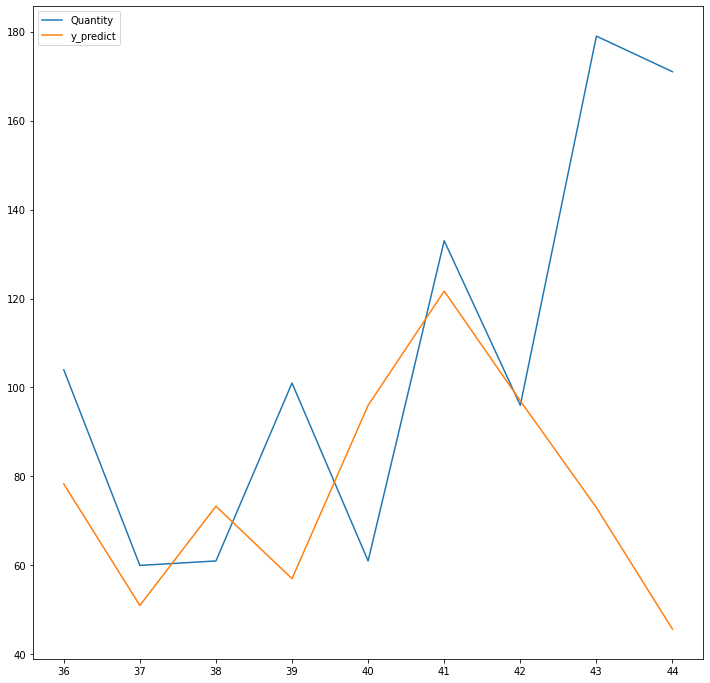

In [17]:
data_fur1_test['y_predict'] = y_predict
data_fur1_test[['Quantity','y_predict']].plot.line()

In [20]:
from sklearn.metrics import mean_squared_error
RMSE = sqrt(mean_squared_error(data_fur1_test.Quantity.values, y_predict))
print(RMSE)

33.71922565634828
